<a href="https://colab.research.google.com/github/nesrinechemkhi/Eniac_Discounts/blob/main/Eniac_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders_url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
orderlines_url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
products_url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
brands_url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"

def import_csv(url):
  path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
  return pd.read_csv(path)

# Importing csvs and correcting data types
orderlines_qu = import_csv(orderlines_url)
orderlines_qu['date'] = pd.to_datetime(orderlines_qu['date'])
orders_qu = import_csv(orders_url)
orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'])
products_cl = import_csv(products_url)
brands_df = import_csv(brands_url)
# import categories file
url = "https://drive.google.com/file/d/1Tnw1hRN2xs2aXZrfOlFSS0efSxtKDyO9/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
df_categories = pd.read_csv(path)

# Incorporating additional information into orderlines data frame
orderlines_qu['short'] = orderlines_qu['sku'].str[:3]
orderlines_expanded = (
    orderlines_qu
    .merge(products_cl,
           on='sku')
    .merge(brands_df,
           on='short')
    .rename(columns={'long':'brand'})
    .drop(columns='short')
)
# Creating composite columns
orderlines_expanded['revenue'] = (
    orderlines_expanded['unit_price'] * orderlines_expanded['product_quantity']
)
orderlines_expanded['discount'] = (
    orderlines_expanded['price'] - orderlines_expanded['unit_price']
)
orderlines_expanded['total_discount'] = (
    orderlines_expanded['discount'] * orderlines_expanded['product_quantity']
)
orderlines_expanded['percentage_discount'] = (
    100 * orderlines_expanded['discount'] / orderlines_expanded['price']
)

In [ ]:
# merge orderlines expanded with categories
ol_cat = orderlines_expanded.merge(df_categories,
                            left_on="type",
                            right_on="type",
                            how = "inner")

In [ ]:
products_cl

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392


In [ ]:
ol_cat['price'].describe()

,price
count,47089.000000
mean,153.756133
std,190.634058
min,2.990000
25%,35.000000
50%,79.990000
75%,179.990000
max,1799.000000


In [ ]:
# How do seasonality and special dates (Christmas, Black Friday) affect sales? (nesrine)


In [ ]:
ol_cat['month_year'] = ol_cat['date'].dt.to_period('M').dt.to_timestamp()

In [ ]:
ol_cat['year'] = ol_cat['date'].dt.year

In [ ]:
ol_cat['month'] = ol_cat['date'].dt.month

In [ ]:
ol_cat_2017 = ol_cat[ol_cat['year'] == 2017]

bins = [0, 35, 70, 90, 100]  # Example discount ranges: 0-10%, 10-20%, 20-30%, 30-100%
labels = ['Low', 'Medium', 'High', 'Very High']  # Labels corresponding to the ranges

# Create a new column 'discount_category' based on these ranges
ol_cat_2017['discount_category'] = pd.cut(ol_cat_2017['percentage_discount'], bins=bins, labels=labels, right=False)
# create df for top 20 most performing brands
top_brands_2017 = ol_cat_2017.groupby('brand')['revenue'].sum().nlargest(20).index
top_20_brands_2017 = ol_cat_2017[ol_cat_2017['brand'].isin(top_brands_2017)]


<ipython-input-11-c643d158ddb9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ol_cat_2017['discount_category'] = pd.cut(ol_cat_2017['percentage_discount'], bins=bins, labels=labels, right=False)


In [ ]:
bins2 = [0, 100, 500, 1000, 1799]
labels2 = ['Low', 'Medium', 'High', 'Very High']  # Labels corresponding to the ranges

# Create a new column 'discount_category' based on these ranges
products_cl['price_category'] = pd.cut(products_cl['price'], bins=bins2, labels=labels2, right=False)

prices = products_cl.groupby(['price_category'])['price'].size().reset_index(name='product_count')
sorted_prices = prices.sort_values(by='product_count', ascending=False)
sorted_prices

<ipython-input-4-248af1084dd8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prices = products_cl.groupby(['price_category'])['price'].size().reset_index(name='product_count')


,price_category,product_count
0,Low,4864
1,Medium,2288
2,High,972
3,Very High,707


<Axes: xlabel='price_category', ylabel='product_count'>

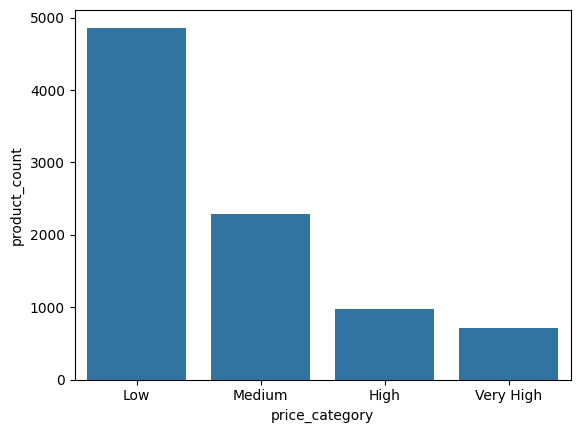

In [ ]:
sns.barplot(data=sorted_prices, x='price_category', y='product_count')


<ipython-input-12-addc901bb49f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ol_cat_2017["discount_y"] = ol_cat_2017["percentage_discount"] > 0


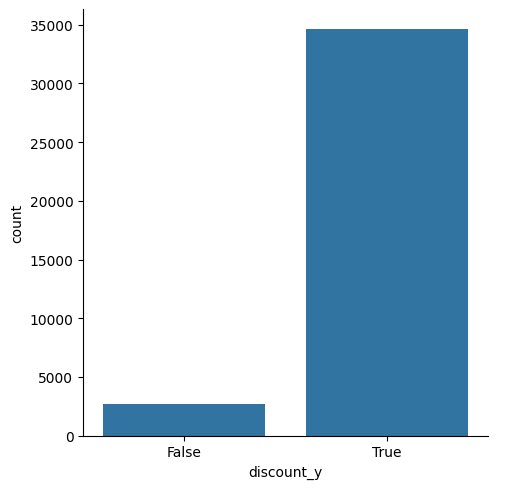

In [ ]:
ol_cat_2017["discount_y"] = ol_cat_2017["percentage_discount"] > 0

sns.catplot(data=ol_cat_2017, x='discount_y', kind='count')

In [ ]:
top_20_brands_2017

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,...,brand,revenue,discount,total_discount,percentage_discount,Category Name,month_year,year,month,discount_category
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,...,OWC,47.49,13.50,13.50,22.134776,drives,2017-01-01,2017,1,Low
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,...,Apple,72.19,16.81,16.81,18.887640,battery_adapter,2017-01-01,2017,1,Low
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,...,Crucial,60.90,16.09,16.09,20.898818,miscellaneous,2017-01-01,2017,1,Low
6,1119181,299571,0,1,SYN0139,166.24,2017-01-01 04:00:44,Synology DS216j NAS Server Mac and PC,NAS server 2 bays and 2 USB 3.0 high-speed por...,175.99,...,Synology,166.24,9.75,9.75,5.540088,nas,2017-01-01,2017,1,Low
8,1119189,299579,0,1,LGE0031-A,127.08,2017-01-01 08:23:14,"Open - LG Monitor 24 ""W 5ms HDMI 24MP58VQ-White",Monitor 24-inch FHD IPS refitted HDMI connecti...,159.00,...,LG,127.08,31.92,31.92,20.075472,monitors,2017-01-01,2017,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37315,1529460,472717,0,2,WDT0347,92.34,2017-12-31 21:01:07,WD Blue 250GB SATA 3 SSD Disk 7mm,SSD 250GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,99.00,...,Western Digital,184.68,6.66,13.32,6.727273,ssd,2017-12-01,2017,12,Low
37317,1529480,478283,0,1,APP1973,464.32,2017-12-31 21:46:06,Apple iPhone SE 128GB Rose Gold,New iPhone screen 4-inch 128 GB free.,529.00,...,Apple,464.32,64.68,64.68,12.226843,iphone,2017-12-01,2017,12,Low
37321,1529504,478292,0,1,SAN0181,42.28,2017-12-31 22:23:31,Sandisk Extreme Memory Card v30 microSDXC 64GB...,MicroSDXC memory card 64GB UHS Class 3 v30 spe...,49.99,...,SanDisk,42.28,7.71,7.71,15.423085,memory,2017-12-01,2017,12,Low
37323,1529532,478292,0,1,CRU0051,121.90,2017-12-31 23:24:05,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,...,Crucial,121.90,36.76,36.76,23.169041,ssd,2017-12-01,2017,12,Low


In [ ]:
top_20_brands = ol_cat.groupby('brand')['revenue'].sum().nlargest(20)
top_20_brands

,revenue
brand,
Apple,1571122.87
LaCie,454136.87
OWC,454042.39
Pack,450145.29
Western Digital,365381.41
LG,328723.82
Crucial,274923.82
Wacom,274069.92
Dell,265147.84


In [ ]:
top_20_brands_2017["percentage_discount"].mean()

18.89400500404316

In [ ]:
top_20_brands_2017["price"].mean()

211.8481923180231

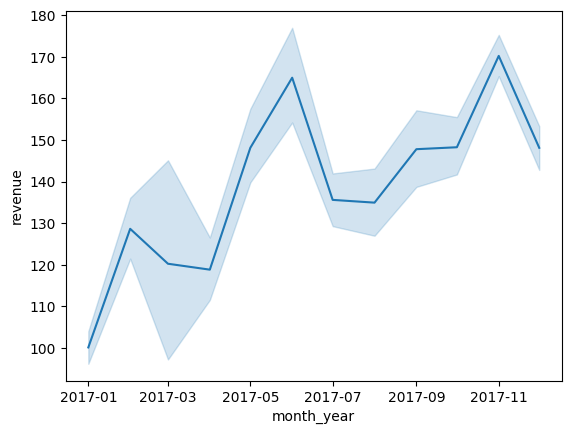

In [ ]:
# Line plot showing revenue
sns.lineplot(data=ol_cat_2017, x='month_year', y='revenue');
plt.show()


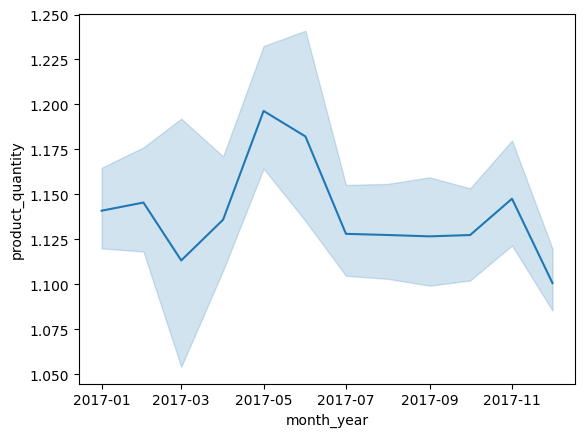

In [ ]:
# Line plot showing quantity
sns.lineplot(data=ol_cat_2017, x='month_year', y='product_quantity');
plt.show()

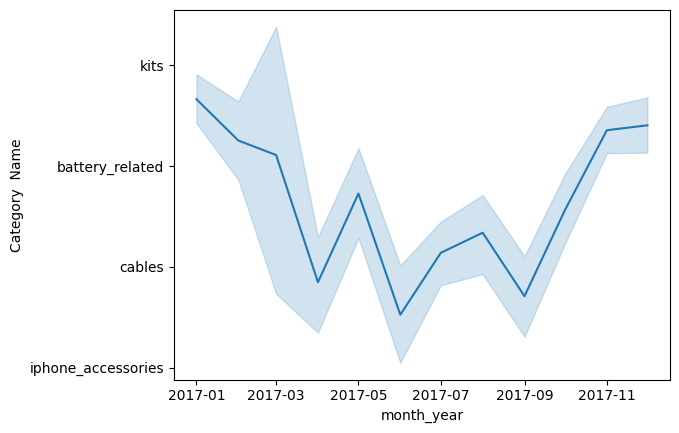

In [ ]:
# Category sub products or top 10
sns.lineplot(data=ol_cat_2017, x='month_year', y='Category  Name');
plt.show()

<ipython-input-20-8ff838384c5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ol_cat_2017['quarter'] = ol_cat_2017['date'].dt.quarter


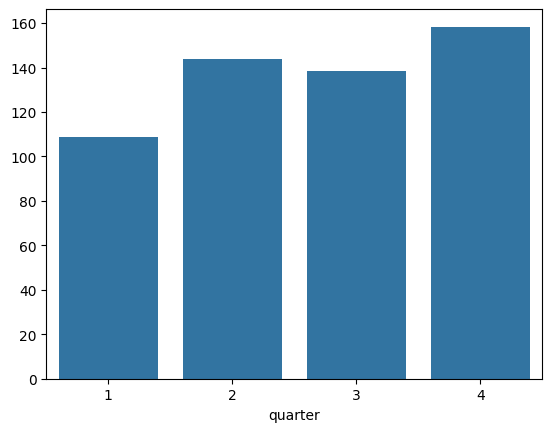

In [ ]:
ol_cat_2017['quarter'] = ol_cat_2017['date'].dt.quarter
avg_sales_by_quarter = ol_cat_2017.groupby('quarter')['revenue'].mean()
sns.barplot(x=avg_sales_by_quarter.index, y=avg_sales_by_quarter.values);


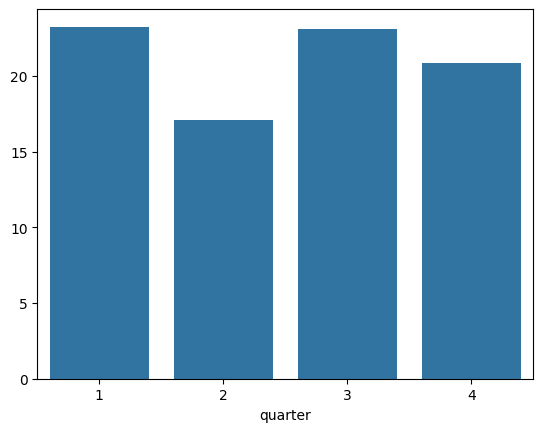

In [ ]:
avg_disc_by_quarter = ol_cat_2017.groupby('quarter')['percentage_discount'].mean()
sns.barplot(x=avg_disc_by_quarter.index, y=avg_disc_by_quarter.values);

In [ ]:
avg_disc_df = avg_disc_by_quarter.reset_index()

In [ ]:
avg_disc_by_month = ol_cat.groupby('month')['percentage_discount'].mean()
avg_disc_by_month

,percentage_discount
month,
1,22.910648
2,21.194958
3,22.194685
4,18.810393
5,15.404490
6,17.389897
7,25.904594
8,21.108169
9,20.643875


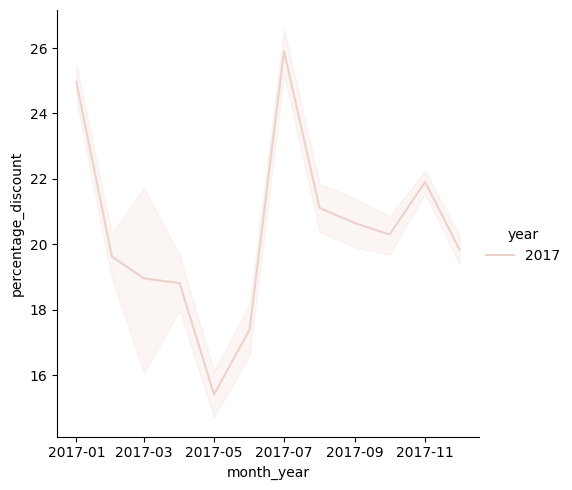

In [ ]:
sns.relplot(data=ol_cat_2017, x='month_year', y='percentage_discount', kind='line', hue='year')


In [ ]:
top_15_list = []

for year, group in ol_cat.groupby('year'):
    # Get the top 15 days for each year by revenue
    top_15 = group.nlargest(15, 'revenue')
    top_15_list.append(top_15)

# Concatenate all the top 15 days dataframes
top_15_days = pd.concat(top_15_list).reset_index(drop=True)


In [ ]:
top_15_days['date'] = top_15_days['date'].dt.strftime('%d %b %Y')
top_15_days

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,...,type,brand,revenue,discount,total_discount,percentage_discount,Category Name,month_year,year,month
0,1427896,434662,0,32,SAM0070,214.90,23 Nov 2017,512GB Samsung SSD 850 PRO,SSD 512 GB with 3D VNAND.,249.99,...,12215397,Samsung,6876.80,35.09,1122.88,14.036561,ssd,2017-11-01,2017,11
1,1315561,388292,0,20,DLL0035,289.99,10 Aug 2017,"Dell U2415 Monitor 24 ""FHD",FHD 24-inch monitor with multiple ports for Ma...,371.99,...,1296,Dell,5799.80,82.00,1640.00,22.043603,monitors,2017-08-01,2017,8
2,1358679,403104,0,8,LGE0044,559.99,22 Sep 2017,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.00,...,1296,LG,4479.92,39.01,312.08,6.512521,monitors,2017-09-01,2017,9
3,1430435,435746,0,27,WAC0191,141.67,23 Nov 2017,Education - Wacom Intuos Comic M Black,multi-touch graphics tablet with pen precision...,199.99,...,1405,Wacom,3825.09,58.32,1574.64,29.161458,wacom_products,2017-11-01,2017,11
4,1266571,364878,0,6,APP0909,635.99,12 Jun 2017,Apple Mac mini Core i5 14GHz | 8GB RAM | 500GB...,PC Mac Mini i5 14GHz 8GB 500GB (MGEM2YP / A).,675.59,...,1282,Apple,3815.94,39.60,237.60,5.861543,apple_mac,2017-06-01,2017,6
5,1426046,417672,0,8,DLL0015,442.74,23 Nov 2017,"Dell U2715H Monitor 27 ""LED Slim Marco",27-inch LED Monitor Marco Slim.,574.99,...,1296,Dell,3541.92,132.25,1058.00,23.000400,monitors,2017-11-01,2017,11
6,1285969,374301,0,27,MAT0007,119.99,07 Jul 2017,Matias Bluetooth keyboard Aluminum + Spanish n...,Aluminum Bluetooth keypad manages 4 devices si...,119.99,...,13855401,Matias,3239.73,0.00,0.00,0.000000,keyboard,2017-07-01,2017,7
7,1262759,362950,0,3,APP1642,909.00,06 Jun 2017,Apple iPhone 7 Plus 32GB Gold,New Apple iPhone 32GB 7 plus free gold,779.00,...,85651716,Apple,2727.00,-130.00,-390.00,-16.688062,iphone,2017-06-01,2017,6
8,1422565,432242,0,35,CRU0050,77.90,22 Nov 2017,Crucial MX300 275GB SSD Disk,SSD 275GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,98.39,...,12215397,Crucial,2726.50,20.49,717.15,20.825287,ssd,2017-11-01,2017,11
9,1436244,438686,0,4,SAM0086,635.26,24 Nov 2017,Samsung 850 EVO SSD Disk 2TB,SSD hard drive Mac and PC 25-inch 2TB SATA III...,727.99,...,12215397,Samsung,2541.04,92.73,370.92,12.737812,ssd,2017-11-01,2017,11


In [ ]:
top_15_days.sort_values(by='revenue', ascending=False)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,...,type,brand,revenue,discount,total_discount,percentage_discount,Category Name,month_year,year,month
0,1427896,434662,0,32,SAM0070,214.90,23 Nov 2017,512GB Samsung SSD 850 PRO,SSD 512 GB with 3D VNAND.,249.99,...,12215397,Samsung,6876.80,35.09,1122.88,14.036561,ssd,2017-11-01,2017,11
15,1582288,499191,0,12,LGE0044,569.99,26 Jan 2018,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.00,...,1296,LG,6839.88,29.01,348.12,4.843072,monitors,2018-01-01,2018,1
1,1315561,388292,0,20,DLL0035,289.99,10 Aug 2017,"Dell U2415 Monitor 24 ""FHD",FHD 24-inch monitor with multiple ports for Ma...,371.99,...,1296,Dell,5799.80,82.00,1640.00,22.043603,monitors,2017-08-01,2017,8
2,1358679,403104,0,8,LGE0044,559.99,22 Sep 2017,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.00,...,1296,LG,4479.92,39.01,312.08,6.512521,monitors,2017-09-01,2017,9
3,1430435,435746,0,27,WAC0191,141.67,23 Nov 2017,Education - Wacom Intuos Comic M Black,multi-touch graphics tablet with pen precision...,199.99,...,1405,Wacom,3825.09,58.32,1574.64,29.161458,wacom_products,2017-11-01,2017,11
4,1266571,364878,0,6,APP0909,635.99,12 Jun 2017,Apple Mac mini Core i5 14GHz | 8GB RAM | 500GB...,PC Mac Mini i5 14GHz 8GB 500GB (MGEM2YP / A).,675.59,...,1282,Apple,3815.94,39.60,237.60,5.861543,apple_mac,2017-06-01,2017,6
5,1426046,417672,0,8,DLL0015,442.74,23 Nov 2017,"Dell U2715H Monitor 27 ""LED Slim Marco",27-inch LED Monitor Marco Slim.,574.99,...,1296,Dell,3541.92,132.25,1058.00,23.000400,monitors,2017-11-01,2017,11
6,1285969,374301,0,27,MAT0007,119.99,07 Jul 2017,Matias Bluetooth keyboard Aluminum + Spanish n...,Aluminum Bluetooth keypad manages 4 devices si...,119.99,...,13855401,Matias,3239.73,0.00,0.00,0.000000,keyboard,2017-07-01,2017,7
16,1613765,511483,0,10,DLL0035,285.00,14 Feb 2018,"Dell U2415 Monitor 24 ""FHD",FHD 24-inch monitor with multiple ports for Ma...,371.99,...,1296,Dell,2850.00,86.99,869.90,23.385037,monitors,2018-02-01,2018,2
7,1262759,362950,0,3,APP1642,909.00,06 Jun 2017,Apple iPhone 7 Plus 32GB Gold,New Apple iPhone 32GB 7 plus free gold,779.00,...,85651716,Apple,2727.00,-130.00,-390.00,-16.688062,iphone,2017-06-01,2017,6


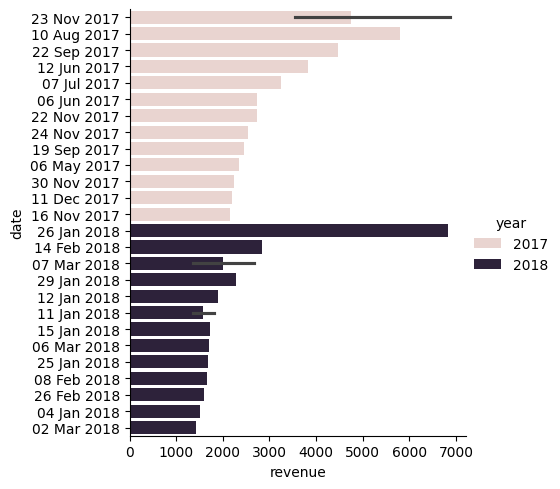

In [ ]:
sns.catplot(data=top_15_days, y='date', x='revenue', kind='bar', hue='year')

In [ ]:
top_2017 = ol_cat[ol_cat['year'] == 2017].nlargest(15, 'revenue')
top_2018 = ol_cat[ol_cat['year'] == 2018].nlargest(5, 'revenue')

In [ ]:
top_2017['date'] = top_2017['date'].dt.strftime('%d %b %Y')
top_2018['date'] = top_2018['date'].dt.strftime('%d %b %Y')

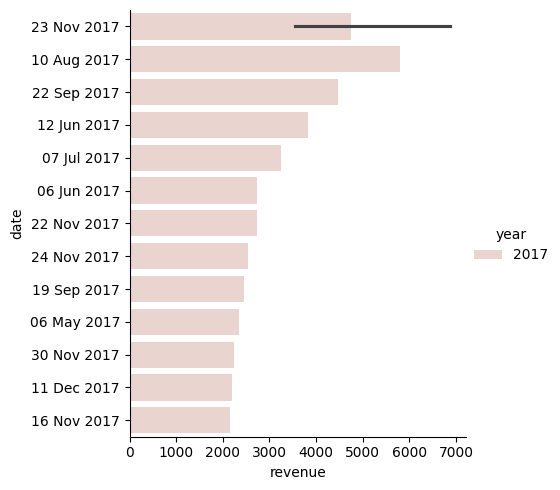

In [ ]:
sns.catplot(data=top_2017, y='date', x='revenue', kind='bar', hue='year')

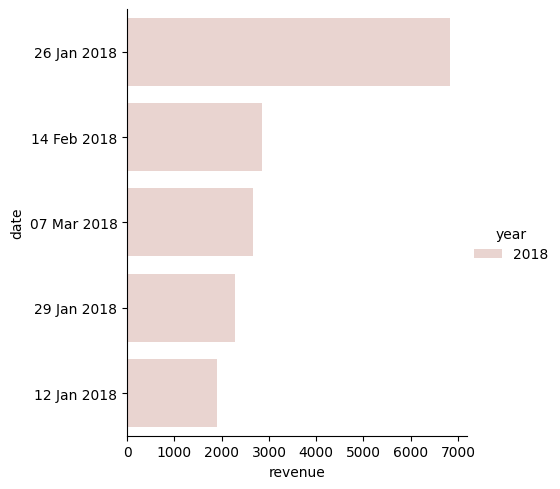

In [ ]:
sns.catplot(data=top_2018, y='date', x='revenue', kind='bar', hue='year')

In [ ]:
monthly_revenue = ol_cat_2017.groupby(['year', 'month'])['revenue'].sum().reset_index()
sorted_monthly_revenue = monthly_revenue.sort_values(by='revenue', ascending=False)
sorted_monthly_revenue

,year,month,revenue
10,2017,11,1225826.08
11,2017,12,785382.28
0,2017,1,554010.04
6,2017,7,494344.63
9,2017,10,451392.28
7,2017,8,332448.08
8,2017,9,328941.47
1,2017,2,302406.58
4,2017,5,295621.41
5,2017,6,267071.75


<Axes: xlabel='month', ylabel='revenue'>

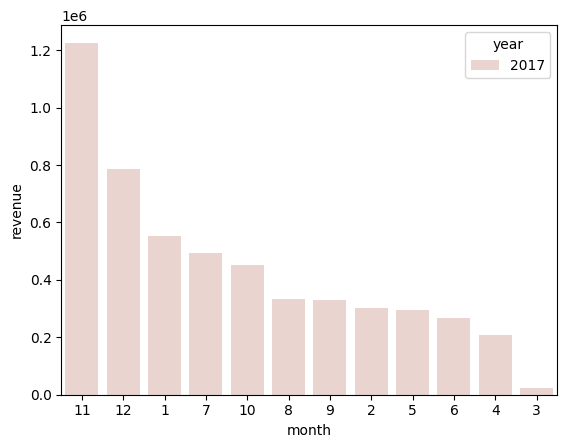

In [ ]:
sns.barplot(data=sorted_monthly_revenue, x='month', y='revenue', hue='year', order=sorted_monthly_revenue['month'])

In [ ]:
monthly_revenue_d = ol_cat_2017.groupby(['discount_category'])['revenue'].sum().reset_index()
sorted_monthly_revenue_d = monthly_revenue_d.sort_values(by='revenue', ascending=False)
sorted_monthly_revenue_d

<ipython-input-35-3ff82a4ae68f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue_d = ol_cat_2017.groupby(['discount_category'])['revenue'].sum().reset_index()


,discount_category,revenue
0,Low,4728665.87
1,Medium,245682.77
2,High,14070.78
3,Very High,23.68


<Axes: xlabel='discount_category', ylabel='revenue'>

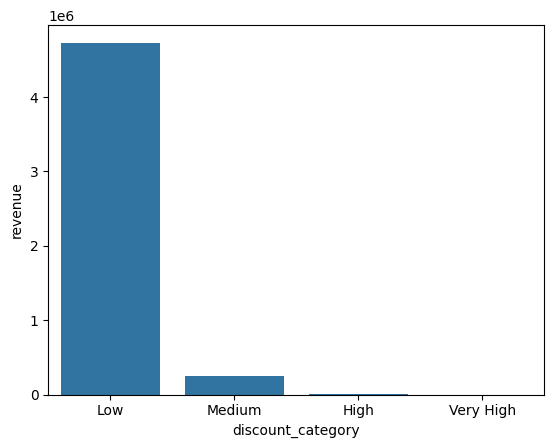

In [ ]:
sns.barplot(data=sorted_monthly_revenue_d, x='discount_category', y='revenue')

In [ ]:
monthly_revenue_d20 = top_20_brands_2017.groupby(['discount_category'])['revenue'].mean().reset_index()
sorted_monthly_revenue_d20 = monthly_revenue_d20.sort_values(by='revenue', ascending=False)
sorted_monthly_revenue_d20

<ipython-input-37-16780180922b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue_d20 = top_20_brands_2017.groupby(['discount_category'])['revenue'].mean().reset_index()


,discount_category,revenue
0,Low,215.333136
1,Medium,46.408128
2,High,30.622179
3,Very High,23.680000


In [ ]:
product_prices_d20 = top_20_brands_2017.groupby(['Category  Name'])['price'].mean().reset_index()
product_prices_d20

,Category Name,price
0,adapters,67.294321
1,apple_mac,945.586493
2,bag,52.190000
3,battery_adapter,90.830986
4,battery_related,86.637255
5,cables,30.784056
6,cases,82.476636
7,charges_lightning,45.763698
8,drive,70.748836
9,drives,136.745205


In [ ]:
product_prices_d20['price'].mean()

230.57764465222849

In [ ]:
top_prices = product_prices_d20.head(10)
sorted_top_prices = top_prices.sort_values(by='price', ascending=False)
sorted_top_prices

,Category Name,price
1,apple_mac,945.586493
9,drives,136.745205
3,battery_adapter,90.830986
4,battery_related,86.637255
6,cases,82.476636
8,drive,70.748836
0,adapters,67.294321
2,bag,52.190000
7,charges_lightning,45.763698
5,cables,30.784056


<Axes: xlabel='price', ylabel='Category  Name'>

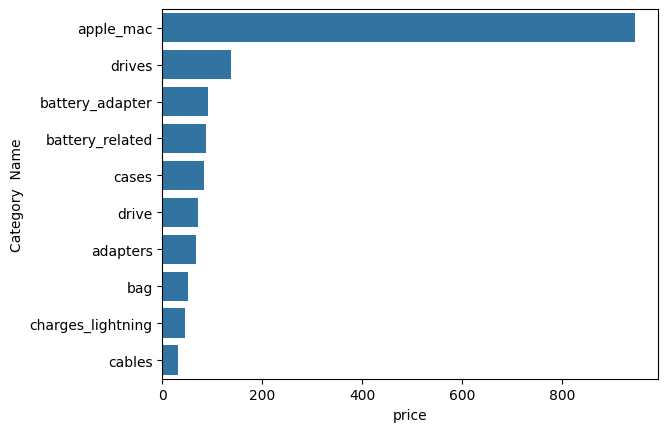

In [ ]:
sns.barplot(data=sorted_top_prices, y='Category  Name', x='price')

<Axes: xlabel='discount_category', ylabel='revenue'>

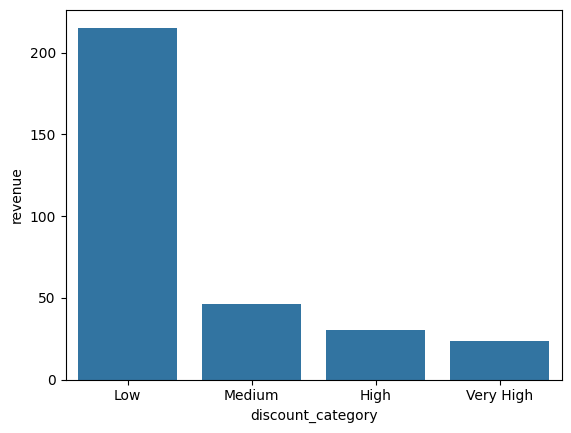

In [ ]:
average_revenue = sorted_monthly_revenue_d20.groupby('discount_category', observed=False)['revenue'].mean().reset_index()

sns.barplot(data=average_revenue, x='discount_category', y='revenue')


<Axes: xlabel='discount_category', ylabel='revenue'>

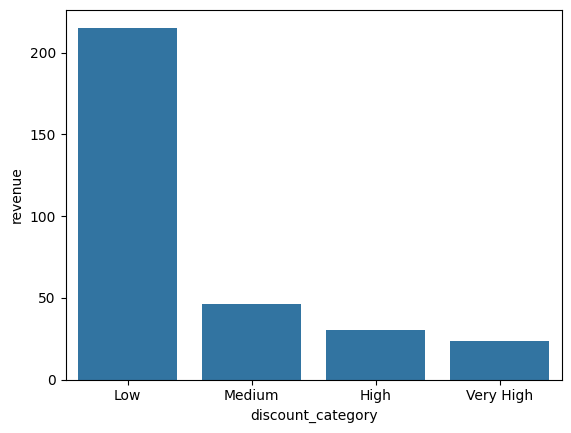

In [ ]:
sum_revenue = sorted_monthly_revenue_d20.groupby('discount_category', observed=False)['revenue'].sum().reset_index()

sns.barplot(data=sum_revenue, x='discount_category', y='revenue')


In [ ]:
average_revenue

,discount_category,revenue
0,Low,215.333136
1,Medium,46.408128
2,High,30.622179
3,Very High,23.680000


<ipython-input-45-82d54e7afbe1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_qty_d20 = top_20_brands_2017.groupby(['discount_category'])['product_quantity'].sum().reset_index()


<Axes: xlabel='discount_category', ylabel='product_quantity'>

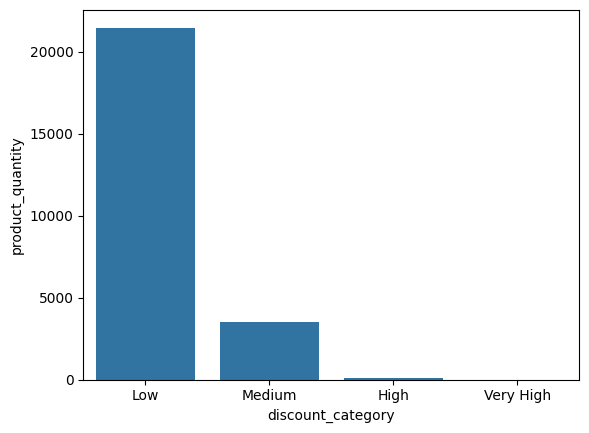

In [ ]:
monthly_qty_d20 = top_20_brands_2017.groupby(['discount_category'])['product_quantity'].sum().reset_index()
sorted_monthly_qty_d20 = monthly_qty_d20.sort_values(by='product_quantity', ascending=False)

sum_qty = sorted_monthly_qty_d20.groupby('discount_category', observed=False)['product_quantity'].sum().reset_index()

sns.barplot(data=sum_qty, x='discount_category', y='product_quantity')


<ipython-input-46-64b99d784781>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_monthly_qty_d20 = top_20_brands_2017.groupby(['discount_category'])['product_quantity'].mean().reset_index()


<Axes: xlabel='discount_category', ylabel='product_quantity'>

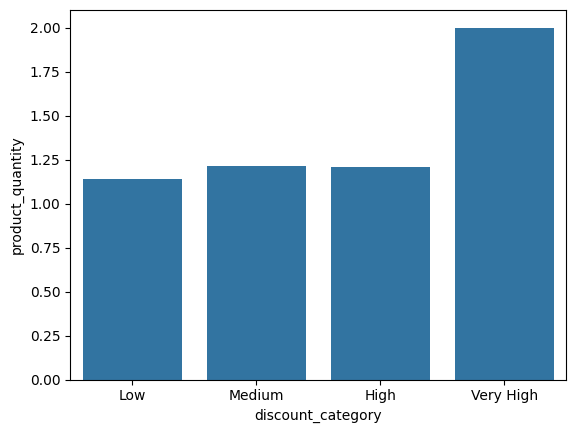

In [ ]:
avg_monthly_qty_d20 = top_20_brands_2017.groupby(['discount_category'])['product_quantity'].mean().reset_index()
avg_sorted_monthly_qty_d20 = avg_monthly_qty_d20.sort_values(by='product_quantity', ascending=False)

avg_qty = avg_sorted_monthly_qty_d20.groupby('discount_category', observed=False)['product_quantity'].mean().reset_index()

sns.barplot(data=avg_qty, x='discount_category', y='product_quantity')


<ipython-input-48-f628719aa348>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_monthly_qty_d20 = top_20_brands_2017.groupby(['discount_category'])['product_quantity'].sum().reset_index()


<Axes: xlabel='discount_category', ylabel='product_quantity'>

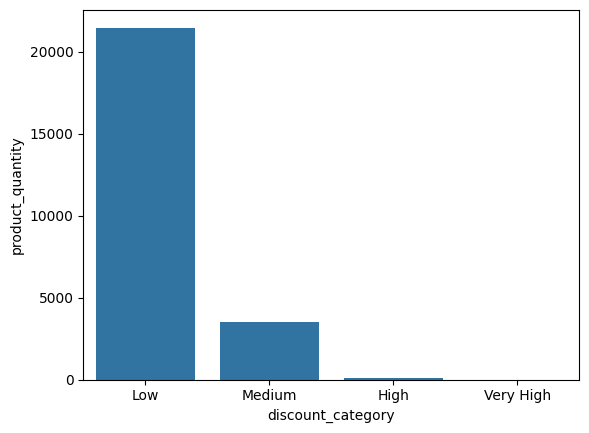

In [ ]:
total_monthly_qty_d20 = top_20_brands_2017.groupby(['discount_category'])['product_quantity'].sum().reset_index()
total_sorted_monthly_qty_d20 = total_monthly_qty_d20.sort_values(by='product_quantity', ascending=False)
sns.barplot(data=total_sorted_monthly_qty_d20, x='discount_category', y='product_quantity')

<ipython-input-57-6e3cf7c36c96>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_qty_by_discount_category = order_product_qty.groupby('discount_category')['total_product_quantity'].sum().reset_index()


<Axes: xlabel='discount_category', ylabel='total_product_quantity'>

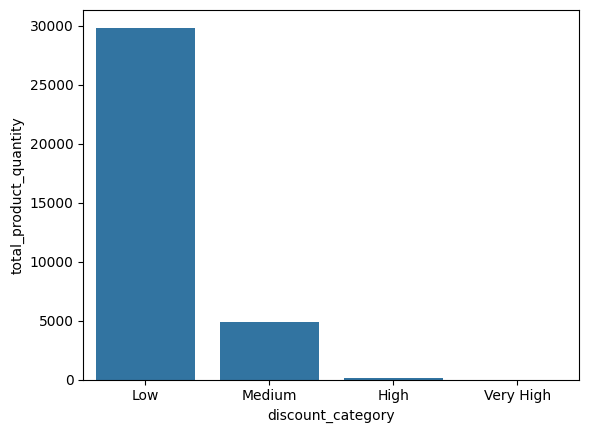

In [ ]:
# Group by 'order_id' and sum the 'product_quantity' to get the total number of products per order
order_product_qty = top_20_brands_2017.groupby('id_order')['product_quantity'].sum().reset_index(name='total_product_quantity')

# Merge the summed product quantities back with the 'discount_category' data
order_product_qty = order_product_qty.merge(top_20_brands_2017[['id_order', 'discount_category']], on='id_order', how='left')

# Group by 'discount_category' and sum the total product quantities
product_qty_by_discount_category = order_product_qty.groupby('discount_category')['total_product_quantity'].sum().reset_index()

# Create the bar plot
sns.barplot(data=product_qty_by_discount_category, x='discount_category', y='total_product_quantity')

In [ ]:
# Count orders per discount category
order_count_by_discount = top_20_brands_2017.groupby('discount_category')['id_order'].nunique().reset_index(name='order_count')

# Sum total product quantity per discount category
total_qty_by_discount = top_20_brands_2017.groupby('discount_category')['product_quantity'].sum().reset_index(name='total_product_quantity')

# Merge both to see orders and total product quantities side by side
discount_summary = order_count_by_discount.merge(total_qty_by_discount, on='discount_category')
print(discount_summary)

  discount_category  order_count  total_product_quantity
0               Low        16254                   21462
1            Medium         2721                    3509
2              High           78                      94
3         Very High            1                       2


<ipython-input-62-9d34219763b1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_count_by_discount = top_20_brands_2017.groupby('discount_category')['id_order'].nunique().reset_index(name='order_count')
<ipython-input-62-9d34219763b1>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_qty_by_discount = top_20_brands_2017.groupby('discount_category')['product_quantity'].sum().reset_index(name='total_product_quantity')


In [ ]:
# Count orders per discount category
order_count_by_discount = top_20_brands_2017.groupby('discount_category')['id_order'].nunique().reset_index(name='order_count')

# Sum total product quantity per discount category
avg_qty_by_discount = top_20_brands_2017.groupby('discount_category')['product_quantity'].mean().reset_index(name='avg_product_quantity')

# Merge both to see orders and total product quantities side by side
discount_summary = order_count_by_discount.merge(avg_qty_by_discount, on='discount_category')
print(discount_summary)

  discount_category  order_count  avg_product_quantity
0               Low        16254              1.142386
1            Medium         2721              1.216291
2              High           78              1.205128
3         Very High            1              2.000000


<ipython-input-63-d956690f9a59>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_count_by_discount = top_20_brands_2017.groupby('discount_category')['id_order'].nunique().reset_index(name='order_count')
<ipython-input-63-d956690f9a59>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_qty_by_discount = top_20_brands_2017.groupby('discount_category')['product_quantity'].mean().reset_index(name='avg_product_quantity')


In [ ]:
top_20_brands_2017.groupby('discount_category')['product_quantity'].describe()


<ipython-input-47-2b483e510409>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_20_brands_2017.groupby('discount_category')['product_quantity'].describe()


,count,mean,std,min,25%,50%,75%,max
discount_category,,,,,,,,
Low,18787.0,1.142386,0.950385,1.0,1.0,1.0,1.0,72.0
Medium,2885.0,1.216291,0.997750,1.0,1.0,1.0,1.0,30.0
High,78.0,1.205128,0.465957,1.0,1.0,1.0,1.0,3.0
Very High,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0


In [ ]:
avg_qty

,discount_category,product_quantity
0,Low,1.142386
1,Medium,1.216291
2,High,1.205128
3,Very High,2.000000


In [ ]:
# first, look at business questions and brainstorm ideas to answer each question
# look into brands, categories, and discounts
# look into each one and its correlation with revenues and quantities
# timeline, top 10 lists
# We can discuss how to be more creative